<a href="https://colab.research.google.com/github/dmaxim/MxMessaging/blob/master/safari-ai-ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[0.7341001]
 [1.2525206]
 [1.2025424]], shape=(3, 1), dtype=float32)


In [3]:
x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.38734412]
 [0.11076999]
 [0.4935385 ]], shape=(3, 1), dtype=float32)


In [6]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)


tf.Tensor(9.8, shape=(), dtype=float32)


## Linear classifier

In [8]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                      np.ones((num_samples_per_class, 1), dtype="float32")))


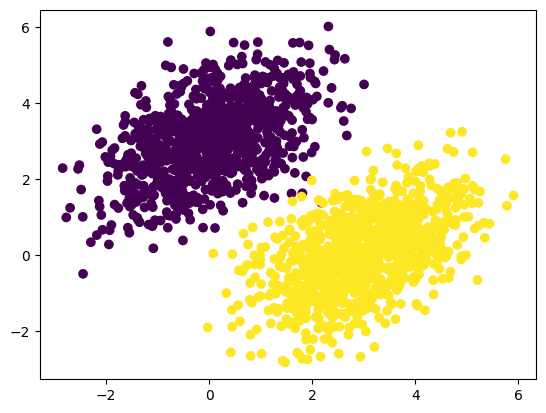

In [10]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


In [11]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [14]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [13]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)


## Training Step

In [16]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


In [17]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"loss at step: {step}: {loss:.4f}")


loss at step: 0: 4.4157
loss at step: 1: 0.6864
loss at step: 2: 0.2154
loss at step: 3: 0.1420
loss at step: 4: 0.1241
loss at step: 5: 0.1145
loss at step: 6: 0.1066
loss at step: 7: 0.0996
loss at step: 8: 0.0931
loss at step: 9: 0.0873
loss at step: 10: 0.0819
loss at step: 11: 0.0770
loss at step: 12: 0.0725
loss at step: 13: 0.0684
loss at step: 14: 0.0647
loss at step: 15: 0.0613
loss at step: 16: 0.0582
loss at step: 17: 0.0553
loss at step: 18: 0.0527
loss at step: 19: 0.0504
loss at step: 20: 0.0482
loss at step: 21: 0.0462
loss at step: 22: 0.0444
loss at step: 23: 0.0427
loss at step: 24: 0.0412
loss at step: 25: 0.0398
loss at step: 26: 0.0386
loss at step: 27: 0.0374
loss at step: 28: 0.0364
loss at step: 29: 0.0354
loss at step: 30: 0.0345
loss at step: 31: 0.0337
loss at step: 32: 0.0330
loss at step: 33: 0.0323
loss at step: 34: 0.0317
loss at step: 35: 0.0311
loss at step: 36: 0.0306
loss at step: 37: 0.0302
loss at step: 38: 0.0297
loss at step: 39: 0.0293


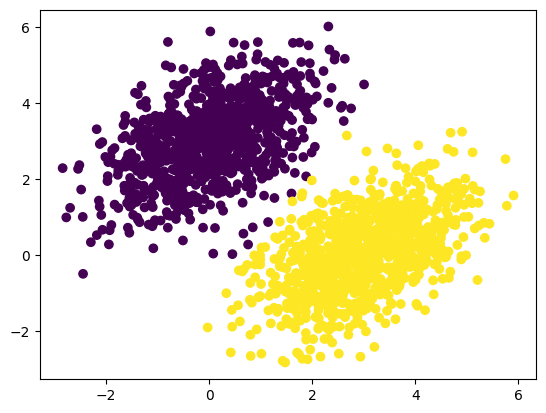

In [18]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

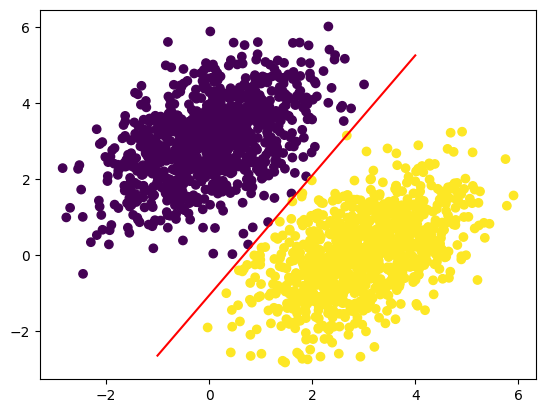

In [20]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

-r - Plot as a red line